<a href="https://colab.research.google.com/github/cosmicishan/Classification-of-Diabetes-Patients/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have a dataset that is originally from the National Institute of Diabetes and Digestive and Kidney disease. The objective of this notebook is to diagnostically predict whether the patient has diabetes or not through the diagnostic measurements included in the dataset.

# Scikit-Learn


## Importing Libraries

In [93]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


plt.style.use('ggplot')

## Importing Dataset and Checking statistics

In [94]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Diabetes/diabetes.csv')

In [95]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Training the Model

### Splitting Datsets

In [97]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)

### Training model

In [99]:
#Setting up an array to check outcome on different number of neighbors
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test) 

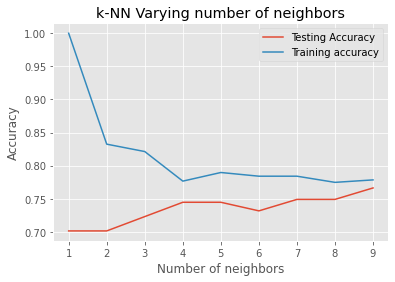

In [100]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Testing accuracy is decreasing after the neigbor increase more than 7. So we gonna choose 7 as nearest neighbor

In [101]:
knn = KNeighborsClassifier(n_neighbors=7)

In [102]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [103]:
knn.score(X_test,y_test)

0.7489177489177489

### Checking the performance of model


#### Confusion Matrix

In [104]:
y_pred = knn.predict(X_test)

In [105]:
confusion_matrix(y_test,y_pred)

array([[121,  29],
       [ 29,  52]])

#### Classification Report

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       150
           1       0.64      0.64      0.64        81

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



#### ROC Curve

In [107]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

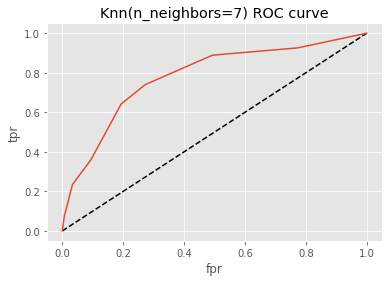

In [109]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [110]:
roc_auc_score(y_test,y_pred_proba)

0.7790534979423869

## Cross Validation

In [111]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [112]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
knn_cv.best_score_

0.7578558696205755

In [114]:
knn_cv.best_params_

{'n_neighbors': 14}